# *Predicting Economic Recovery During a Pandemic*

###   File: DSC630 FINAL PROJECT CODE.py
###   Name: Adam Curry
###   Date: 09/21/2020
###   Last Modified: 11/15/2020
###   Course: DSC630 Predictive Analytics
###   Desc: This program examines five tables. Four taken form Opportunity Insights' Economic Tracker website and the other from the Oxford Covid-19 Government Response Tracker.
###   Usage: This program should be used when reviewing Adam Curry's Final


 

 
***

# SECTION 1: Data Gathering
#### Import the data and necessary libraries. Then conduct some preliminary analysis of each table

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3

## GEO ID's

Geographic identifier: `statefips`

- `statename`: The name of the state.
- `stateabbrev`: The 2-letter state abbreviation.
- `state_pop2019`: The population of the state in 2019, from Census Bureau estimates.

In [4]:
dfGEO = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/GeoIDs%20-%20State.csv")
print('list column headers')
print(list(dfGEO))
print('\n\n')
print('list the unique categorical variables for counts')
print(dfGEO.describe(include=['O']))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfGEO.statename.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfGEO.statename.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfGEO.head(5))
print('\n\n')
print('get data types')
print(dfGEO.dtypes)
print('\n\n')
print('Total Population')
print(dfGEO.state_pop2019.sum()) # 328.2 billion matches a quick Google search
print('\n\n')
print('state pop descriptive stats')
print(dfGEO.state_pop2019.describe())

list column headers
['statefips', 'statename', 'stateabbrev', 'state_pop2019']



list the unique categorical variables for counts
       statename stateabbrev
count         51          51
unique        51          51
top     Virginia          PA
freq           1           1



list the unique categorical variables - states:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']



ensure there are no dups on state:
Virginia                1
Wyom

## GOOGLE MOBILITY
GPS mobility data indexed to Jan 3-Feb 6 2020 from [Google COVID-19 Community Mobility Reports](https://www.google.com/covid19/mobility/).

- `gps_away_from_home`: Time spent outside of residential locations.
- `gps_retail_and_recreation`: Time spent at retail and recreation locations.
- `gps_grocery_and_pharmacy`: Time spent at grocery and pharmacy locations.
- `gps_parks`: Time spent at parks.
- `gps_transit_stations`: Time at inside transit stations.
- `gps_workplaces`: Time spent at work places.
- `gps_residential`: Time spent at residential locations.

list column headers
['statefips', 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations', 'gps_workplaces', 'date']



list the unique categorical variables - states:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]



ensure there are no dups on state:
55    261
41    261
19    261
11    261
50    261
42    261
34    261
26    261
18    261
10    261
2     261
49    261
33    261
35    261
25    261
17    261
9     261
1     261
56    261
48    261
40    261
32    261
24    261
16    261
27    261
51    261
47    261
53    261
39    261
31    261
23    261
15    261
54    261
46    261
38    261
30    261
22    261
6     261
45    261
4     261
37    261
29    261
21    261
13    261
5     261
44    261
36    261
28    261
20    261
12    261
8     261
Name: statefips, dtype: int64



view the first 5 records
   statefips  gps_retail_and_recreation  gps_

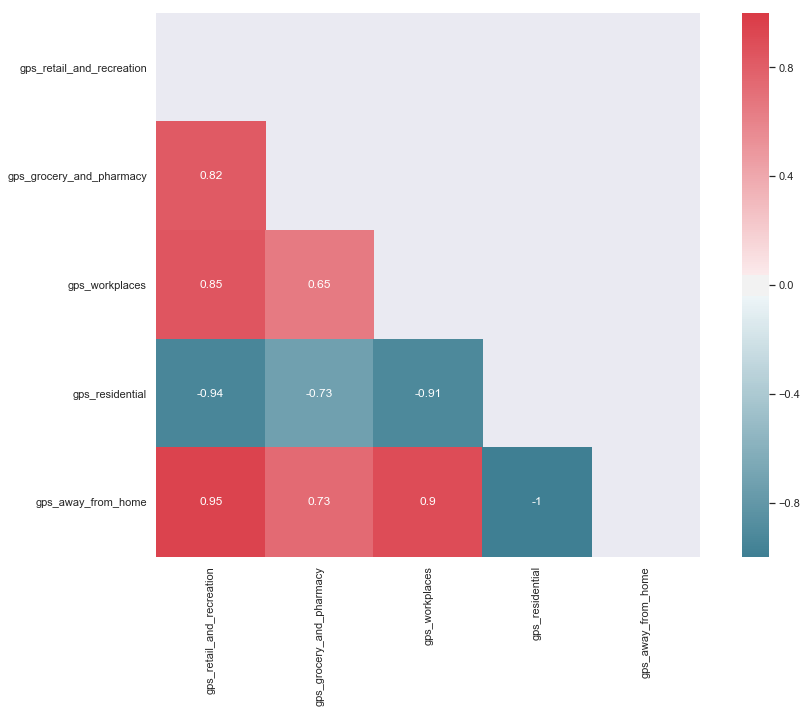

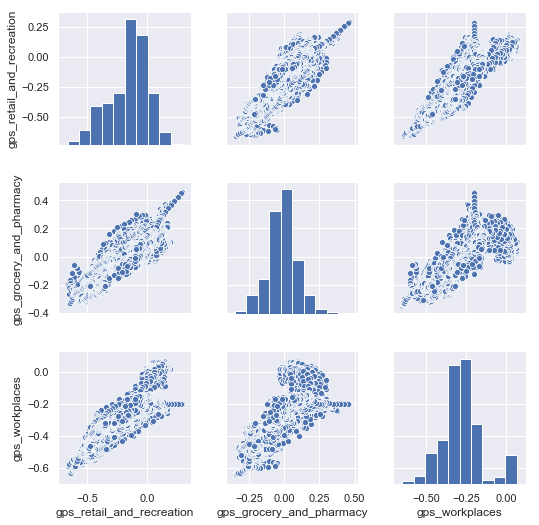

In [90]:
"""GPS mobility data - Daily"""
dfGoogleMobility = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Google%20Mobility%20-%20State%20-%20Daily.csv")
del dfGoogleMobility['gps_parks']

# view a correlation matrix heatmap
X = dfGoogleMobility.iloc[:, 4:]
f, ax = plt.subplots(figsize=(15, 10))
corr = X.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
# remove values with >.90 correlation coeff
del dfGoogleMobility['gps_residential']
del dfGoogleMobility['gps_away_from_home']
X = dfGoogleMobility.iloc[:, 4:]
dfGoogleMobility['date'] = pd.to_datetime(dfGoogleMobility[['year', 'month', 'day']])
del dfGoogleMobility['year']
del dfGoogleMobility['month']
del dfGoogleMobility['day']
# plot the data
sns.pairplot(X)

print('list column headers')
print(list(dfGoogleMobility))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfGoogleMobility.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfGoogleMobility.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfGoogleMobility.head(5))
print('\n\n')
print('get data types')
print(dfGoogleMobility.dtypes)
print('\n\n')
print('state pop descriptive stats')
print(X.describe())

## Government Response

A series of novel indices that aggregate various measures of government responses. These indices are used to describe variation in government responses. [Variation in government responses to COVID-19](https://www.bsg.ox.ac.uk/sites/default/files/2020-09/BSG-WP-2020-032-v7.0.pdf).

- `StringencyIndexForDisplay`: A derived variable of several different government response metrics.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


list column headers
['statefips', 'EconomicSupportIndexForDisplay', 'StringencyIndexForDisplay', 'date']



list the unique categorical variables - states:
[ 2  1  5  4  6  8  9 11 10 12 13 15 19 16 17 18 20 21 22 25 24 23 26 27
 29 28 30 37 38 31 33 34 35 32 36 39 40 41 42 44 45 46 47 48 49 51 50 53
 55 54 56]



ensure there are no dups on state:
55    320
41    320
19    320
11    320
50    320
42    320
34    320
26    320
18    320
10    320
2     320
49    320
33    320
35    320
25    320
17    320
9     320
1     320
56    320
48    320
40    320
32    320
24    320
16    320
27    320
51    320
47    320
53    320
39    320
31    320
23    320
15    320
54    320
46    320
38    320
30    320
22    320
6     320
45    320
4     320
37    320
29    320
21    320
13    320
5     320
44    320
36    320
28    320
20    320
12    320
8     320
Name: statefips, dtype: int64



view the first 5 records
   statefips  EconomicSupportIndexForDisplay  StringencyIndexForDisplay  \
0     

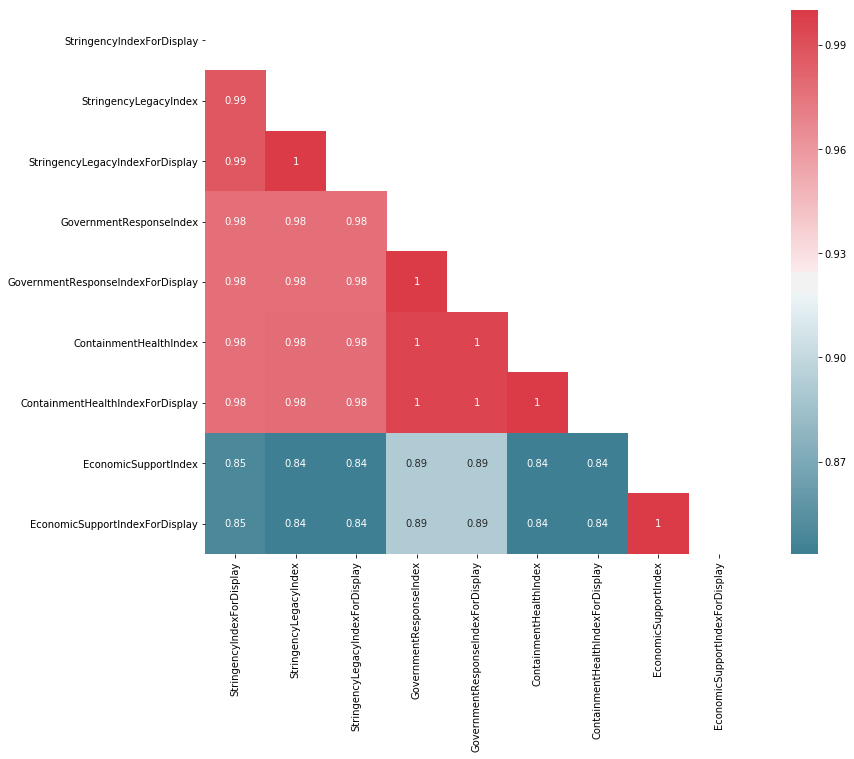

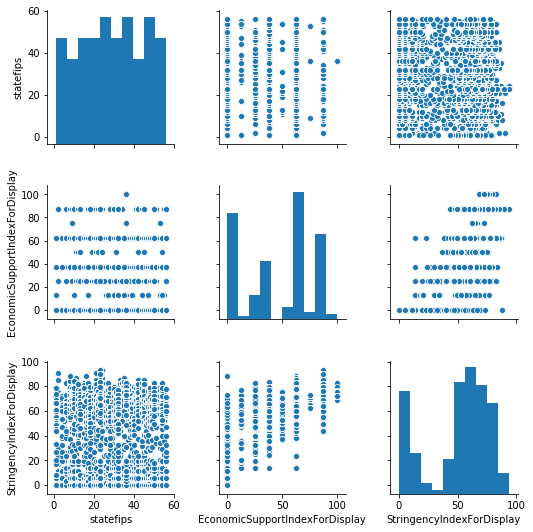

In [5]:
"""Coronavirus Government Response Tracker - Daily"""
dfGvmnt = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')
# remove non-US records
delete_row = dfGvmnt[dfGvmnt['CountryCode'] !='USA'].index
dfGvmnt = dfGvmnt.drop(delete_row)
dfGvmnt = dfGvmnt[dfGvmnt['RegionName'].notna()]
delete_row = dfGvmnt[dfGvmnt['RegionName'] !='USA'].index
# create an abbreviation code to join to the GEO ID's
dfGvmnt['stateabbrev'] = dfGvmnt['RegionCode'].str.split('_').str[-1]

# view a correlation matrix heatmap
X= dfGvmnt.iloc[:, -10:]
f, ax = plt.subplots(figsize=(15, 10))
corr = X.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
#inner join the geo data for easy joins further downstream (easier to join on sttefips)
dfGvmnt = pd.merge(dfGvmnt, dfGEO, on='stateabbrev', how='inner')
# drops 200 records, removes virgin islands
# select specific columns
dfGvmnt = dfGvmnt[['Date', 'statefips','EconomicSupportIndexForDisplay', 'StringencyIndexForDisplay']]
# convert date column to date
dfGvmnt['date'] = pd.to_datetime(dfGvmnt['Date'],format='%Y%m%d')
del dfGvmnt['Date']


# plot the data
sns.pairplot(dfGvmnt)

print('list column headers')
print(list(dfGvmnt))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfGvmnt.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfGvmnt.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfGvmnt.head(5))
print('\n\n')
print('get data types')
print(dfGvmnt.dtypes)
print('\n\n')
print('descriptive stats')
print(dfGvmnt.describe())

## Spending data 
Spending data from [Affinity Solutions](https://www.affinity.solutions).

- `spend_all_incmiddle`: Seasonally adjusted credit/debit card spending by consumers living in ZIP codes with middle (middle two quartiles) median income, relative to January 4-31 2020 in all merchant category codes (MCC), 7 day moving average.

list column headers
['statefips', 'spend_all_incmiddle', 'date']



list the unique categorical variables - states:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]



ensure there are no dups on state:
55    300
41    300
19    300
11    300
50    300
42    300
34    300
26    300
18    300
10    300
2     300
49    300
33    300
35    300
25    300
17    300
9     300
1     300
56    300
48    300
40    300
32    300
24    300
16    300
27    300
51    300
47    300
53    300
39    300
31    300
23    300
15    300
54    300
46    300
38    300
30    300
22    300
6     300
45    300
4     300
37    300
29    300
21    300
13    300
5     300
44    300
36    300
28    300
20    300
12    300
8     300
Name: statefips, dtype: int64



view the first 5 records
   statefips  spend_all_incmiddle       date
0          1                  0.0 2020-01-01
1          2                  0

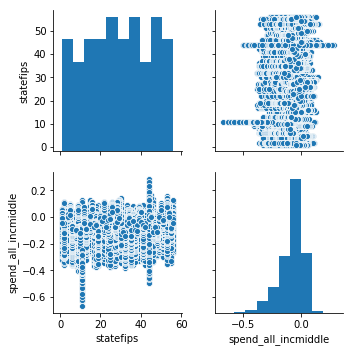

In [2]:
"""Spending data - Daily"""
dfAffinity = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Affinity%20-%20State%20-%20Daily.csv")

# select specific columns
dfAffinity = dfAffinity[['year', 'month', 'day', 'statefips','spend_all_incmiddle']]
dfAffinity['date'] = pd.to_datetime(dfAffinity[['year', 'month', 'day']])
dfAffinity['spend_all_incmiddle'] = dfAffinity['spend_all_incmiddle'].replace('.',0)
dfAffinity['spend_all_incmiddle'] = dfAffinity['spend_all_incmiddle'].apply(pd.to_numeric)

del dfAffinity['year']
del dfAffinity['month']
del dfAffinity['day']

# plot the data
sns.pairplot(dfAffinity)
print('list column headers')
print(list(dfAffinity))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfAffinity.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfAffinity.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfAffinity.head(5))
print('\n\n')
print('get data types')
print(dfAffinity.dtypes)
print('\n\n')
print('descriptive stats')
print(dfAffinity.describe())

## Merchant behavior

Small business revenue data from [Womply](https://www.womply.com/).

- `revenue_all`: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020.

list column headers
['statefips', 'revenue_all', 'date']



list the unique categorical variables - states:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]



ensure there are no dups on state:
55    296
41    296
19    296
11    296
50    296
42    296
34    296
26    296
18    296
10    296
2     296
49    296
33    296
35    296
25    296
17    296
9     296
1     296
56    296
48    296
40    296
32    296
24    296
16    296
27    296
51    296
47    296
53    296
39    296
31    296
23    296
15    296
54    296
46    296
38    296
30    296
22    296
6     296
45    296
4     296
37    296
29    296
21    296
13    296
5     296
44    296
36    296
28    296
20    296
12    296
8     296
Name: statefips, dtype: int64



view the first 5 records
   statefips  revenue_all       date
0          1     -0.01380 2020-01-10
1          2      0.01490 2020-01-10
2          4     -

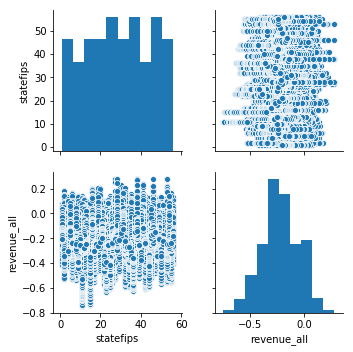

In [6]:
"""Merchant behavior """
dfMerch = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Womply%20Revenue%20-%20State%20-%20Daily.csv")
# view a correlation matrix heatmap
dfMerch= dfMerch.iloc[:, :5]
dfMerch['date'] = pd.to_datetime(dfMerch[['year', 'month', 'day']])
del dfMerch['year']
del dfMerch['month']
del dfMerch['day']

# plot the data
sns.pairplot(dfMerch)
print('list column headers')
print(list(dfMerch))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfMerch.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfMerch.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfMerch.head(5))
print('\n\n')
print('get data types')
print(dfMerch.dtypes)
print('\n\n')
print('descriptive stats')
print(dfMerch.describe())

## Employment

Employment levels relative to Jan 4-31 from [Paychex](https://www.paychex.com/), [Intuit](https://www.intuit.com/), [Earnin](https://www.earnin.com/) and [Kronos](https://www.kronos.com/).

- `emp_combined_incmiddle`: Employment level for workers in the middle two quartiles of the income distribution (incomes approximately 27,000 to 60,000).

list column headers
['date', 'statefips', 'emp_combined_incmiddle']



list the unique categorical variables - states:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]



ensure there are no dups on state:
55    255
41    255
19    255
11    255
50    255
42    255
34    255
26    255
18    255
10    255
2     255
49    255
33    255
35    255
25    255
17    255
9     255
1     255
56    255
48    255
40    255
32    255
24    255
16    255
27    255
51    255
47    255
53    255
39    255
31    255
23    255
15    255
54    255
46    255
38    255
30    255
22    255
6     255
45    255
4     255
37    255
29    255
21    255
13    255
5     255
44    255
36    255
28    255
20    255
12    255
8     255
Name: statefips, dtype: int64



view the first 5 records
        date  statefips  emp_combined_incmiddle
0 2020-01-14          1                -0.00875
1 2020-01-14          

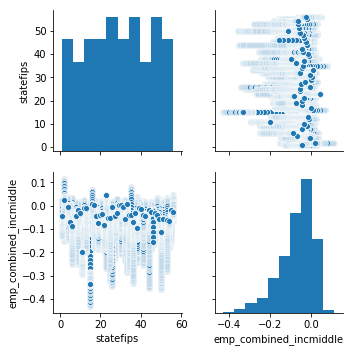

In [12]:
"""Middle Class Employement """
dfEmpl = pd.read_csv("https://raw.githubusercontent.com/OpportunityInsights/EconomicTracker/main/data/Employment%20Combined%20-%20State%20-%20Daily.csv")
dfEmpl['date'] = pd.to_datetime(dfEmpl[['year', 'month', 'day']])
del dfEmpl['year']
del dfEmpl['month']
del dfEmpl['day']

dfEmpl = dfEmpl[["date","statefips","emp_combined_incmiddle"]]

# plot the data
sns.pairplot(dfEmpl)
print('list column headers')
print(list(dfEmpl))
print('\n\n')
print('list the unique categorical variables - states:')
print(dfEmpl.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(dfEmpl.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(dfEmpl.head(5))
print('\n\n')
print('get data types')
print(dfEmpl.dtypes)
print('\n\n')
print('descriptive stats')
print(dfEmpl.describe())

## Calendar
This step creates a calendar for a cross join done further downstream. This will ensure every date is accounted for for the measurement period (i.e. no dates are overlooked for any states).

In [9]:
# create a calendar table for a cross join
rng = pd.date_range('2020-01-01', periods=366, freq='D')
dfcalendar = pd.DataFrame({ 'Date': rng}) 

# create dummy columns for a cross jon
dfcalendar['key'] = 0
dfGEO['key'] = 0

dfData = dfGEO.merge(dfcalendar, how='outer')
del dfData['key']

## Join all tables into one with SQL DB
All the data were joined via SQL. This was easier to do for time constraints, as loading the data once to a SQL database was easier than rerunning the entire process. Also, I'm a bit more familiar with SQL, so the joins and some of the aggregation was easier to do.

In [98]:
# dump the data into a sqllite database
connection = sqlite3.connect("df_Joiner.db")
cursor = connection.cursor()

# drop existing tbales

sql_command = """ DROP TABLE dfEmpl;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE dfData;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE dfGoogleMobility;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE dfGvmnt;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE dfAffinity;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE dfMerch;"""
cursor.execute(sql_command)
connection.commit()
sql_command = """ DROP TABLE df;"""
cursor.execute(sql_command)
connection.commit()

# add pandas df's to SQL db
dfData.to_sql(name='dfData', con=connection)
dfGoogleMobility.to_sql(name='dfGoogleMobility', con=connection)
dfGvmnt.to_sql(name='dfGvmnt', con=connection)
dfAffinity.to_sql(name='dfAffinity', con=connection)
dfMerch.to_sql(name='dfMerch', con=connection)
dfEmpl.to_sql(name='dfEmpl', con=connection)

sql_command = """ CREATE TABLE df AS 
                SELECT DISTINCT
                    a.*
                    ,b.gps_retail_and_recreation
                    ,b.gps_grocery_and_pharmacy
                    ,b.gps_transit_stations
                    ,b.gps_workplaces
                    /*remvoing COVID numbers. These are cumulative values.*/
                    /*,c.ConfirmedCases*/
                    /*,c.ConfirmedDeaths*/
                    ,c.StringencyIndexForDisplay
                    ,d.spend_all_incmiddle 
                    ,e.revenue_all
                    ,f.emp_combined_incmiddle
                FROM
                    dfData a
                LEFT JOIN 
                    dfGoogleMobility b ON a.statefips = b.statefips and a.date = b.date
                LEFT JOIN 
                    dfGvmnt c ON a.statefips = c.statefips and a.date = c.date
                LEFT JOIN 
                    dfAffinity d ON a.statefips = d.statefips and a.date = d.date
                LEFT JOIN 
                    dfMerch e ON a.statefips = e.statefips and a.date = e.date
                LEFT JOIN 
                    dfEmpl f ON a.statefips = f.statefips and a.date = f.date
               ;"""

cursor.execute(sql_command)
connection.commit()


df = pd.read_sql('select * from df', connection)
connection.commit()
connection.close()

In [29]:
print('list column headers')
print(list(df))
print('\n\n')
print('list the unique categorical variables - states:')
print(df.statefips.unique())
print('\n\n')
print('ensure there are no dups on state:')
print(df.statefips.value_counts())
print('\n\n')
print('view the first 5 records')
print(df.head(5))
print('\n\n')
print('get data types')
print(df.dtypes)
print('\n\n')
print('descriptive stats')
print(df.describe())

list column headers
['index', 'statefips', 'statename', 'stateabbrev', 'state_pop2019', 'Date', 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations', 'gps_workplaces', 'spend_all_incmiddle', 'revenue_all', 'emp_combined_incmiddle']



list the unique categorical variables - states:
[ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]



ensure there are no dups on state:
47    366
35    366
22    366
6     366
53    366
37    366
21    366
5     366
36    366
20    366
4     366
51    366
19    366
54    366
50    366
34    366
18    366
2     366
49    366
33    366
17    366
1     366
48    366
32    366
38    366
23    366
31    366
11    366
15    366
46    366
30    366
45    366
29    366
13    366
44    366
28    366
12    366
27    366
42    366
39    366
26    366
10    366
41    366
25    366
9     366
56    366
40    366
24    366
8     366
55   

This is a utility feature. Rather than running code beginning to end, the final dataset can be picked up from SQL database

In [99]:
# removing values that don't have Google mapping. This will align all variables to be on the same measurement period
connection = sqlite3.connect("df_Joiner.db")
cursor = connection.cursor()
df = pd.read_sql('''
                select 
                     df.* 
                     ,strftime("%Y%m",Date) as YYYYMM
                from 
                    df 
                where 
                     Date >= '2020-03-01' and Date < '2020-09-01';
                 ''', connection)
connection.commit()

In [100]:
# view columns with nulls
df.isnull().sum()

index                        0
statefips                    0
statename                    0
stateabbrev                  0
state_pop2019                0
Date                         0
gps_retail_and_recreation    0
gps_grocery_and_pharmacy     0
gps_transit_stations         0
gps_workplaces               0
StringencyIndexForDisplay    0
spend_all_incmiddle          0
revenue_all                  0
emp_combined_incmiddle       0
YYYYMM                       0
dtype: int64

This step creates the derived variable, which will later be used to make predictions. The general idea is, middle income spending and middle income employment and overall small business revenue. If the baseline of these three variables is greater than zero, then it could be a good economic sign. 

In [101]:
df["econ_derived"] = (df["spend_all_incmiddle"]*df["revenue_all"]*df["emp_combined_incmiddle"]).round(6).astype(float)

# view columns with nulls
df.isnull().sum()

index                        0
statefips                    0
statename                    0
stateabbrev                  0
state_pop2019                0
Date                         0
gps_retail_and_recreation    0
gps_grocery_and_pharmacy     0
gps_transit_stations         0
gps_workplaces               0
StringencyIndexForDisplay    0
spend_all_incmiddle          0
revenue_all                  0
emp_combined_incmiddle       0
YYYYMM                       0
econ_derived                 0
dtype: int64

#### Create economic performance metric
Step 1 Calculate the z-score to find observations that are >2 standard deveations.  

In [102]:
df_noApril = df[(df['YYYYMM'] > '202004')].copy()

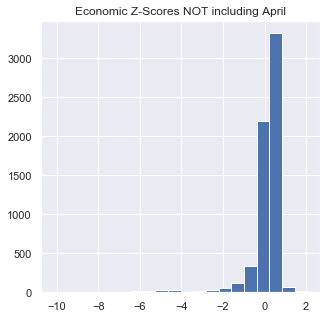

In [103]:
f, ax = plt.subplots(figsize=(5, 5))
df_noApril['zscore_econ'] = (df_noApril.econ_derived - df_noApril.econ_derived.mean())/df_noApril.econ_derived.std()
df_noApril['zscore_econ'].hist(bins=20).set_title('Economic Z-Scores NOT including April')

df_noApril['poor_econ'] = (df_noApril['zscore_econ'] <=-2).astype(int)

Since April was when all lockdowns occurred, this histogram omits this month to see how many observations deviate from the mean.

Next, view which states were less than 2 standard deveations. I did this to ensure there was a decent population of states with "poor" performing economies outside of April. 

In [104]:
df_egre = df_noApril[(df_noApril['zscore_econ'] <=-2)]
df_egre.statename.unique()

array(['California', 'Connecticut', 'District Of Columbia', 'Hawaii',
       'Massachusetts', 'Nevada', 'New York', 'Rhode Island',
       'Washington'], dtype=object)

In [105]:
df['zscore_econ'] = (df.econ_derived - df.econ_derived.mean())/df.econ_derived.std()

Text(0.5, 1.0, 'Z-Score for all observations (include April)')

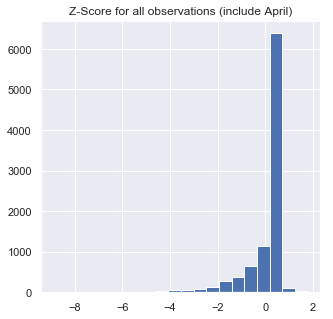

In [106]:
f, ax = plt.subplots(figsize=(5, 5))
df['zscore_econ'].hist(bins=20).set_title('Z-Score for all observations (include April)')

If a state was 2 standard deveations outside of the mean, then I considered them "poor performing"

In [107]:
df['poor_econ'] = (df['zscore_econ'] <=-2).astype(int)
#df.groupby(['statename', 'YYYYMM']).count('poor_econ')

# SECTION 2: Visualizations pre cluster
This section visualizes the data as it sits across all 50 states. There is no clustering done to these visualizations. 

## view a correlation matrix for variables that may need to be removed for high correlation >90

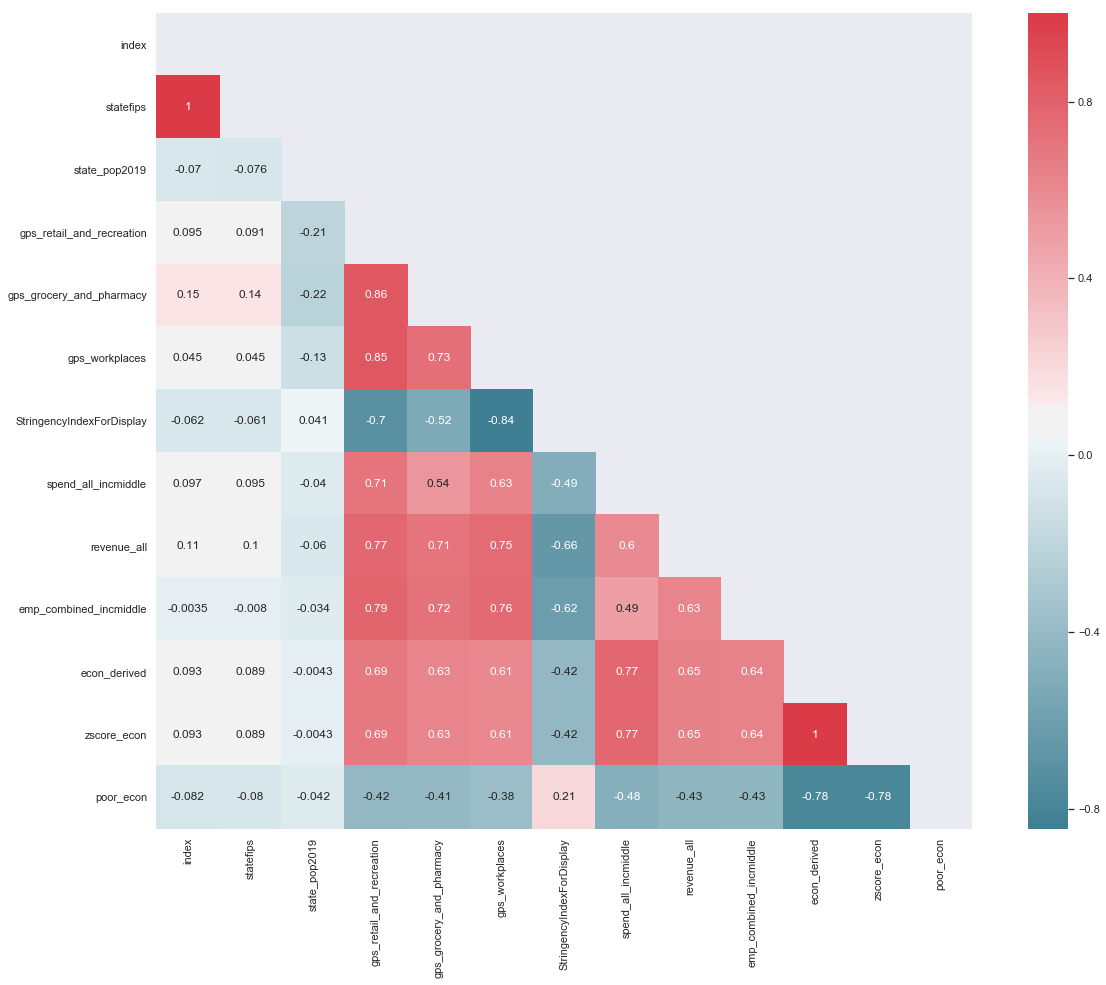

In [108]:
# view a correlation matrix heatmap
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

The remaining appear to be < 90% correlation coef. From this point the data can be examined further for relationships to make inferences about the data. Everything above this line was solely meant to clean and remove data that wouldn't help the analysis. 

This next set of graphs shows how the economic metrics performed over the course of the review period. 

Text(0.5, 1.0, 'US Economic Impact')

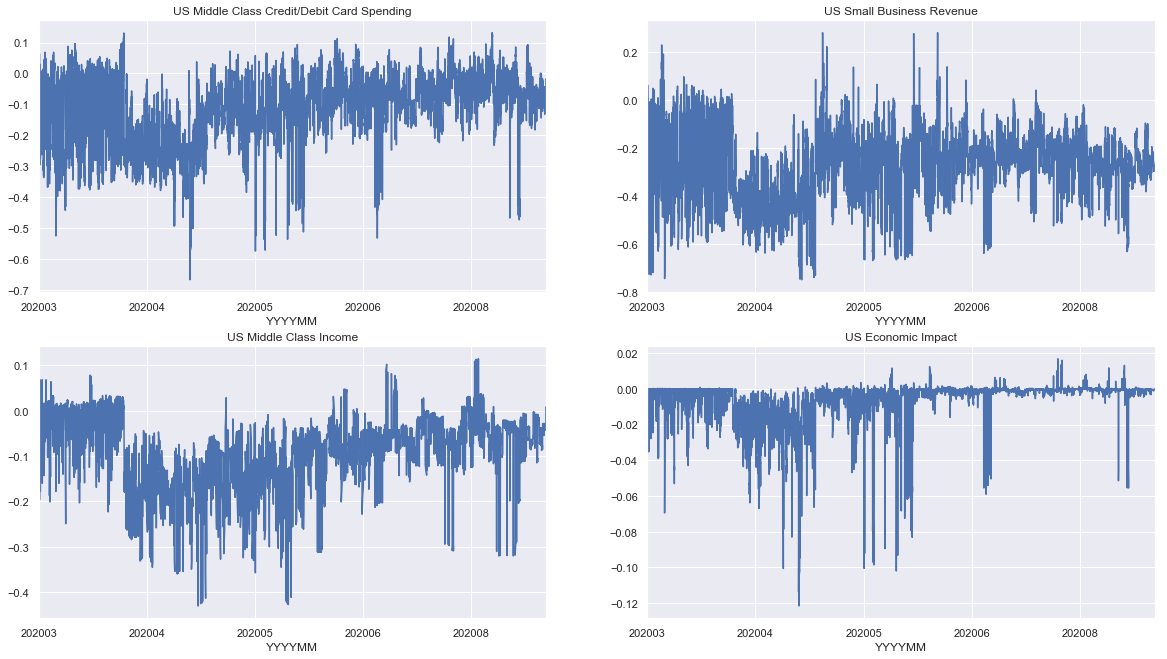

In [109]:
#create line graphs to illustrate time series
df_time = df[['spend_all_incmiddle','revenue_all',
                        'emp_combined_incmiddle','econ_derived',
                        'YYYYMM']]
df_time = df_time.set_index('YYYYMM')
df_time = df_time.sort_index()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 11))
df_time['spend_all_incmiddle'].plot(ax=axes[0,0]); axes[0,0].set_title('US Middle Class Credit/Debit Card Spending')
df_time['revenue_all'].plot(ax=axes[0,1]); axes[0,1].set_title('US Small Business Revenue')
df_time['emp_combined_incmiddle'].plot(ax=axes[1,0]); axes[1,0].set_title('US Middle Class Income')
df_time['econ_derived'].plot(ax=axes[1,1]); axes[1,1].set_title('US Economic Impact')

#### The spending and revenue index shows how spending and revenue in the US shifted from March to August  
    - April was when most states were in lockdown and spending appears less erratic
    - It appears that as states opened, spending patterns increased as did small business revenue
#### The middle-class income index shows similar patterns to revenue and spending and the derived economic index shows how these economic variables translated when multiplied together. 
    - April was when most states were in lockdown and several people were furloughed/laid off
    - Middle class income remains steadily below the 0.0 baseline. 
    - There are some signs of positive economic growth in mid-May, July, and August according to the derived economic index. However, a sharp decline in late August is a potential indicator of poor economic performance. 



The boxplots below offer additional context on the economic metrics

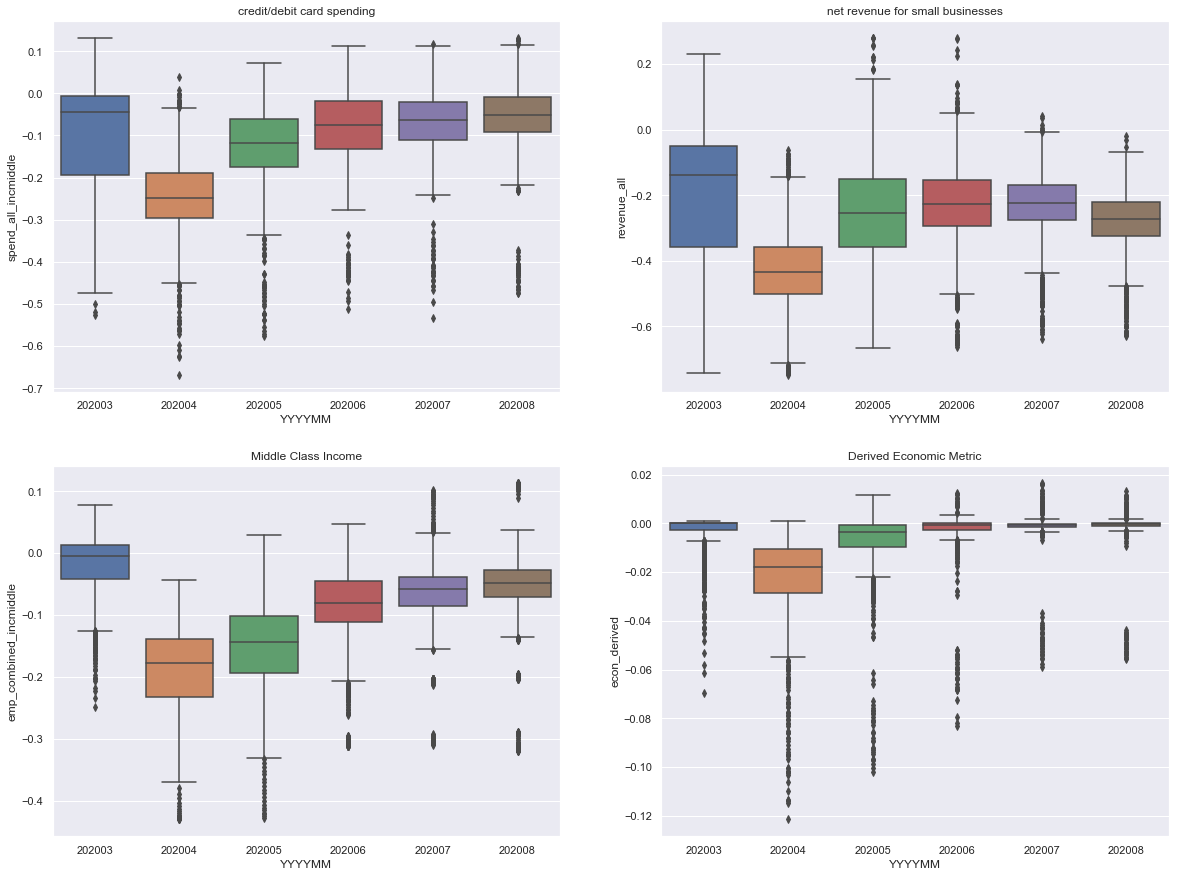

In [70]:
# begin with the "economic" metrics. Primarily spending habits and merchant revenue
df_sns = df[['YYYYMM','spend_all_incmiddle','revenue_all','emp_combined_incmiddle','econ_derived']]
fig, ax =plt.subplots(2,2)
sns.set(rc={'figure.figsize':(20,15)})

ax[0][0]=sns.boxplot(x="YYYYMM", y="spend_all_incmiddle", data=df_sns,ax=ax[0][0]).set_title("credit/debit card spending")
ax[0][1]=sns.boxplot(x="YYYYMM", y="revenue_all", data=df_sns,ax=ax[0][1]).set_title("net revenue for small businesses")
ax[1][0]=sns.boxplot(x="YYYYMM", y="emp_combined_incmiddle", data=df_sns,ax=ax[1][0]).set_title("Middle Class Income")
ax[1][1]=sns.boxplot(x="YYYYMM", y="econ_derived", data=df_sns,ax=ax[1][1]).set_title("Derived Economic Metric")

These boxplots show some interesting results. There are several observations that are outside of the interquartiles on all months, however April stands out as the lowest performing metric on all four graphs, which makes intuitive sense, as this is when the initial lockdowns occured. 

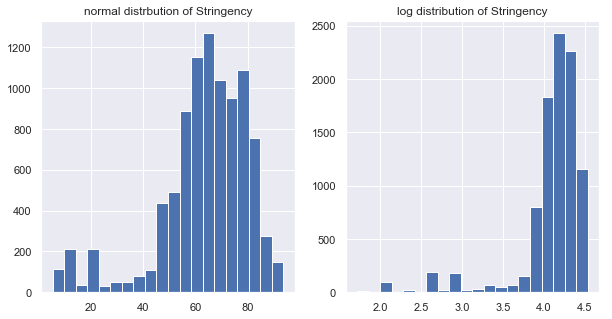

In [122]:
df['logStringencyIndexForDisplay'] = np.log(df['StringencyIndexForDisplay'])

fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(10,10)})

ax[0]= df['StringencyIndexForDisplay'].hist(bins=20,ax=ax[0]).set_title('normal distrbution of Stringency')
ax[1]= df['logStringencyIndexForDisplay'].hist(bins=20,ax=ax[1]).set_title('log distribution of Stringency')

In a similiar fashion, April is the low point for merchant revenue. However, this is very interesting, as several states were showing as outliers in nearly every month. This seems to indicate that some states had better performing small businesses. 

Text(0.5, 1.0, 'Individual States - stringency index vs. retail mobility | economic performance = size')

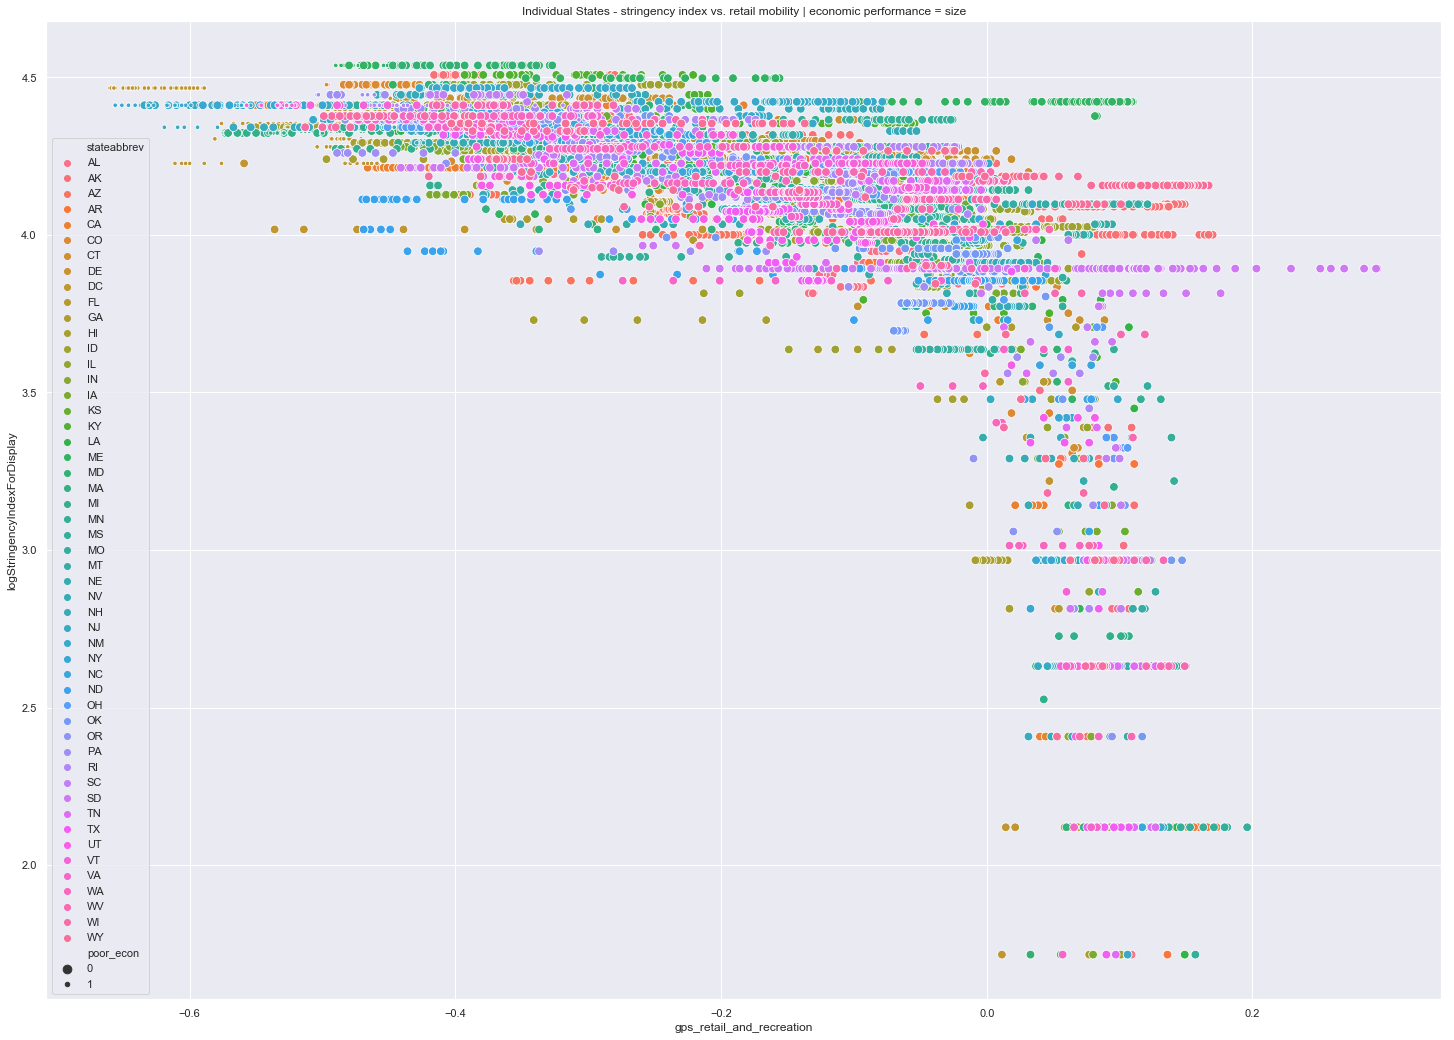

In [142]:
sns.set(rc={'figure.figsize':(25,18)})
sns.scatterplot(
        data=df, x="gps_retail_and_recreation", y="logStringencyIndexForDisplay", hue="stateabbrev", size="poor_econ",
    sizes=(20, 75), hue_norm=(0, 50), legend='full'
).set_title("Individual States - stringency index vs. retail mobility | economic performance = size") 

This scatter plot shows that several that had poor performing economies also had a higher strigency index and lower retail mobility. It appears those economies that devieated >= -2 standard deveations appear toward the top left of the scatter plot. It's important to remember that each point on this scatter plot is a state and a unique day within the measurement period. Meaning, several of the poor metrics could be a result of April's shutdown.

# SECTION 3: See R code where K-means applied on economic data
This entire section is conducted in R. 

In [134]:
df_to_R = df.copy()

In [135]:
# creating a seperate table in the database to conduct K-means in R
connection = sqlite3.connect("df_Joiner.db")
cursor = connection.cursor()
sql_command = """ DROP TABLE df_to_R;"""
cursor.execute(sql_command)
connection.commit()

df_to_R.to_sql(name='df_to_R', con=connection)
cursor = connection.cursor()
connection.commit()
connection.close()

Load the data to the existing workbook after the data in R is calculated

In [146]:
connection = sqlite3.connect("df_Joiner.db")
cursor = connection.cursor()
df_clustered = pd.read_sql('''
                select 
                     *
                from 
                    db_clustered ;
                 ''', connection)
connection.commit()
connection.close()


# for some visuals, add the clusters as strings
df_clustered["cluster_str"] = df_clustered["cluster"].astype(str) 

# SECTION 4: Additional Visualizations

### Government Respons

In [147]:
df_gov = df_clustered[['StringencyIndexForDisplay',
                        'YYYYMM','cluster_str']]
df_gov = df_gov.set_index('cluster_str')
df_gov = df_gov.sort_index()
df_gov['cluster'] = df_gov.index

Text(0.5, 1.0, 'Viola Chart - Clusters compared to Stringency Index by Month')

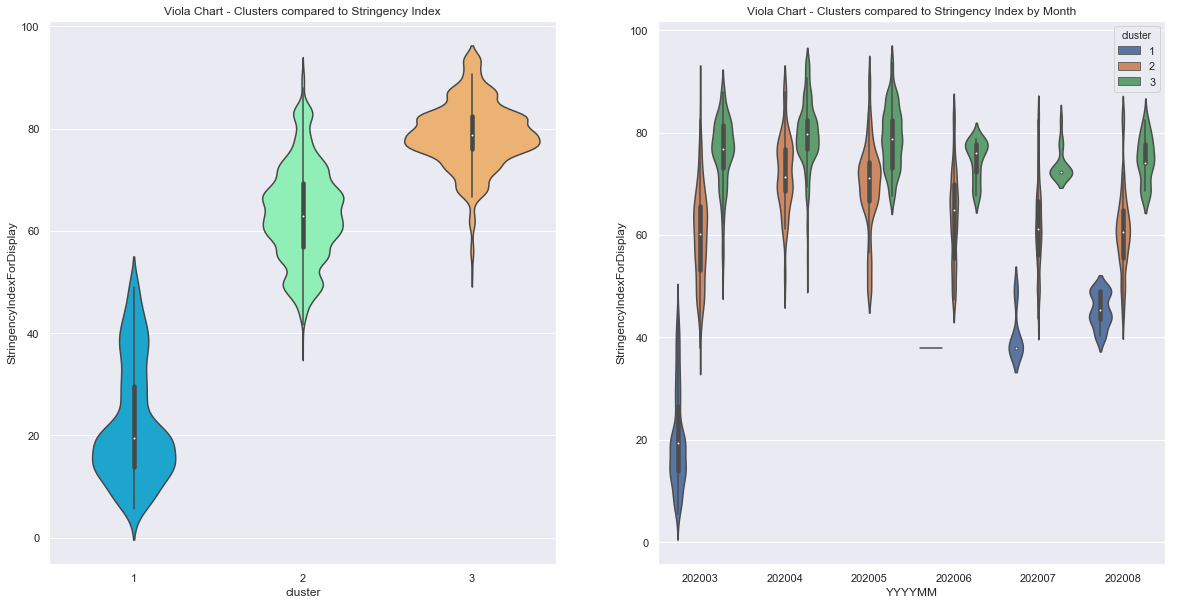

In [150]:
fig, ax =plt.subplots(1,2)
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(x="cluster", y="StringencyIndexForDisplay", 
               data=df_gov,palette='rainbow',ax=ax[0]).set_title('Viola Chart - Clusters compared to Stringency Index')
sns.violinplot(x="YYYYMM", y="StringencyIndexForDisplay", 
               data=df_gov,hue='cluster',split=False,ax=ax[1]).set_title('Viola Chart - Clusters compared to Stringency Index by Month')

#### The first viola chart shows how each cluster relates to the stringency index:
    - Cluster 1 – the least stringent
    - Cluster 2 – 2nd most stringent
    - Cluster 3 – the most stringent

#### The second viola chart shows how the Stringency Index was dispersed over the review period, by cluster
    - March had the lowest stringency to begin the month as cluster one is the most prevalent (this appears to be in line with the timeline of when we learned about the virus)
    - July and August also have some low stringency patterns


Text(0.5, 1.0, 'Economic Metric Vs. Stringency Index(log) by cluster')

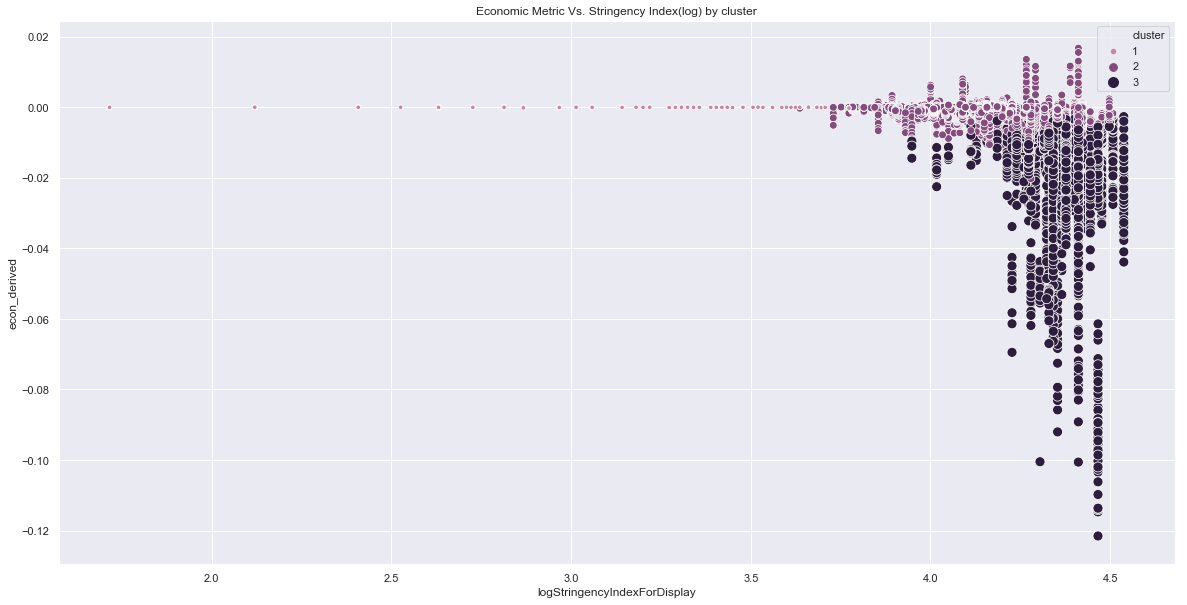

In [153]:
sns.scatterplot(
    data=df_clustered, x="logStringencyIndexForDisplay", y="econ_derived", hue="cluster", size="cluster",
    sizes=(20, 100), hue_norm=(0, 3),
    legend='full').set_title('Economic Metric Vs. Stringency Index(log) by cluster')

#### the scatter plot shows that cluster three had the most stringent government response and also performed the worst on the derived economic metric

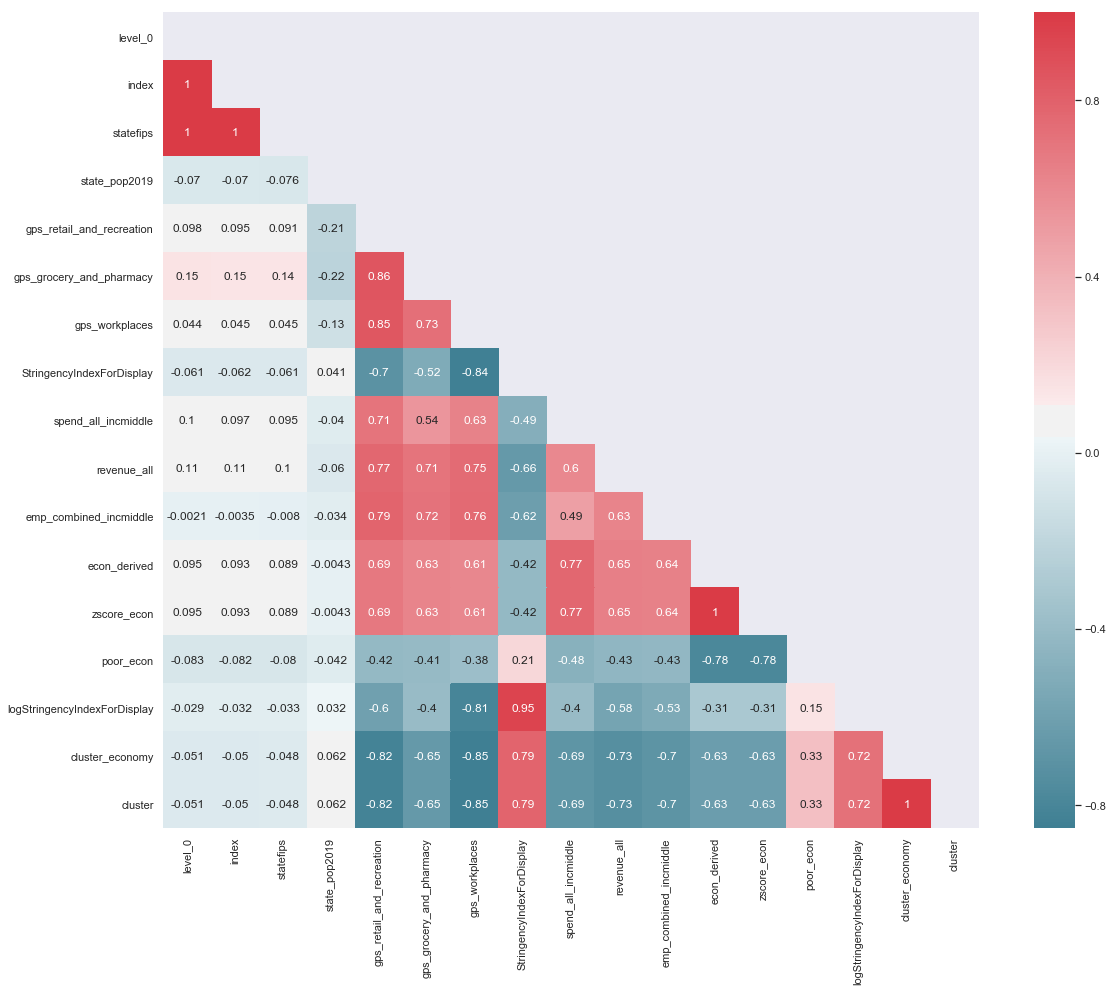

In [156]:
f, ax = plt.subplots(figsize=(20, 15))
corr = df_clustered.corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask=matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

### A correlation heatmap reinforces  the government intervention discussion. There is a negative correlation with government intervention variables related to revenue and spending habits. There is also a negative correlation between the government intervention metrics and the Google gps movement data, except there is less impact on the grocery store and pharmacy metric.
the additional level_0 is from the PCA conduceted in R. 

# SECTION 5: Creating a Model

### the first model is a multi-linear regression to understand more about the target variable in relation to the.
since April was when all states began lockdown, this month was removed in analysis.

In [157]:
list(df_clustered
)

['level_0',
 'index',
 'statefips',
 'statename',
 'stateabbrev',
 'state_pop2019',
 'Date',
 'gps_retail_and_recreation',
 'gps_grocery_and_pharmacy',
 'gps_transit_stations',
 'gps_workplaces',
 'StringencyIndexForDisplay',
 'spend_all_incmiddle',
 'revenue_all',
 'emp_combined_incmiddle',
 'YYYYMM',
 'econ_derived',
 'zscore_econ',
 'poor_econ',
 'logStringencyIndexForDisplay',
 'cluster_economy',
 'cluster',
 'cluster_str']

This first step will run all states through the population. 

In [340]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.regressionplots import abline_plot

In [364]:
df = df_clustered.copy()
#df = df[(df['YYYYMM'] != '202004')]
df = df[['StringencyIndexForDisplay','econ_derived']]
#df["gps_transit_stations"] = pd.to_numeric(df.gps_transit_stations, errors='coerce')

scaler=MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(data=df, columns=['StringencyIndexForDisplay','econ_derived'])
df.head()

,StringencyIndexForDisplay,econ_derived
0,0.000000,0.879066
1,0.031492,0.878813
2,0.031492,0.878582
3,0.031492,0.878813
4,0.031492,0.879066


In [366]:
X = df[['StringencyIndexForDisplay']]
y = df['econ_derived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1001)

    # train the model
model = sm.OLS(y_train, X_train.astype(float))
    # fit the data to the model
results = model.fit()
    # make a prediction on the data
ypred = results.predict(X_test.astype(float))
    # print the results
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:           econ_derived   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                          5.100e+04
Date:                Tue, 17 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:51:49   Log-Likelihood:                         -1032.5
No. Observations:                6568   AIC:                                      2067.
Df Residuals:                    6567   BIC:                                      2074.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Based on the high t statistic and the low p value, it can be ascertained that stringency has an effect on the economic impact. The R2 also indicates that the stringency index accounts for ~89% of the variance in the derived economic metric. 
Since this initial single linear regression was applied across all states, the next steps will seek to implement on the following six specified states:
New Yor, Nebraska, California, Washington D.C., Hawaii, and Rhode Island.


This initial model is a multiregression analysis. Each state will run through a backward elimination process to remove statistically insignificant variables from the data. 

Each dataset will remove the outlier month of April. The summary for each state shows how well each variable fit the data.

In [707]:
df_NY = df_clustered[(df_clustered['stateabbrev'] == 'NY')].copy()
df_NY = df_NY[(df_NY['YYYYMM'] != '202004')]
df_NY = df_NY[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
scaler=MinMaxScaler()
df_NY = scaler.fit_transform(df_NY)
df_NY = pd.DataFrame(data=df_NY, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived'])

X = df_NY[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay']]
y = df_NY['econ_derived']
X_train, X_test, y_train, NYy_test = train_test_split(X, y, test_size=0.4, random_state=101)

# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
NYypred = results.predict(X_test.astype(float))
# print the results
print("\n *************************************NEW YORK************************************\n")
print(results.summary())

df_NE = df_clustered[(df_clustered['stateabbrev'] == 'NE')].copy()
df_NE = df_NE[(df_NE['YYYYMM'] != '202004')]
df_NE = df_NE[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
df_NE = scaler.fit_transform(df_NE)
df_NE = pd.DataFrame(data=df_NE, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy',
                                          'gps_transit_stations','StringencyIndexForDisplay','econ_derived'])

X = df_NE[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy','StringencyIndexForDisplay']]
y = df_NE['econ_derived']
X_train, X_test, y_train, NEy_test = train_test_split(X, y, test_size=0.4, random_state=101)
# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
NEypred = results.predict(X_test.astype(float))
# print the results
print("\n ************************************NEBRASKA************************************\n")
print(results.summary())

df_CA = df_clustered[(df_clustered['stateabbrev'] == 'CA')].copy()
df_CA = df_CA[(df_CA['YYYYMM'] != '202004')]
df_CA = df_CA[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
scaler=MinMaxScaler()
df_CA = scaler.fit_transform(df_CA)
df_CA = pd.DataFrame(data=df_CA, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived'])

X = df_CA[[ 'gps_retail_and_recreation', 'gps_transit_stations',
               'StringencyIndexForDisplay']]
y = df_CA['econ_derived']
X_train, X_test, y_train, CAy_test = train_test_split(X, y, test_size=0.4, random_state=101)
# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
CAypred = results.predict(X_test.astype(float))
# print the results
print("\n ************************************CALIFORNIA************************************\n")
print(results.summary())

df_DC = df_clustered[(df_clustered['stateabbrev'] == 'DC')].copy()
df_DC = df_DC[(df_DC['YYYYMM'] != '202004')]
df_DC = df_DC[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
df_DC = scaler.fit_transform(df_DC)
df_DC = pd.DataFrame(data=df_DC, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived'])

X = df_DC[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay']]
y = df_DC['econ_derived']
X_train, X_test, y_train, DCy_test = train_test_split(X, y, test_size=0.4, random_state=101)
# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
DCypred = results.predict(X_test.astype(float))
# print the results
print("\n **********************************WASHINGTON D.C.**********************************\n")
print(results.summary())

df_HI = df_clustered[(df_clustered['stateabbrev'] == 'HI')].copy()
df_HI = df_HI[(df_HI['YYYYMM'] != '202004')]
df_HI = df_HI[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
df_HI = scaler.fit_transform(df_HI)
df_HI = pd.DataFrame(data=df_HI, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived'])

X = df_HI[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay']]
y = df_HI['econ_derived']
X_train, X_test, y_train, HIy_test = train_test_split(X, y, test_size=0.4, random_state=101)
# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
HIypred = results.predict(X_test.astype(float))
# print the results
print("\n **************************************HAWAII**************************************\n")
print(results.summary())

df_FL = df_clustered[(df_clustered['stateabbrev'] == 'FL')].copy()
df_FL = df_FL[(df_FL['YYYYMM'] != '202004')]
df_FL = df_FL[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived']]
df_FL = scaler.fit_transform(df_FL)
df_FL = pd.DataFrame(data=df_FL, columns=[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay','econ_derived'])

X = df_FL[[ 'gps_retail_and_recreation', 'gps_grocery_and_pharmacy', 'gps_transit_stations',
               'StringencyIndexForDisplay']]
y = df_FL['econ_derived']
X_train, X_test, y_train, FLy_test = train_test_split(X, y, test_size=0.4, random_state=101)
# train the model
model = sm.OLS(y_train, X_train.astype(float))
# fit the data to the model
results = model.fit()
# make a prediction on the data
FLypred = results.predict(X_test.astype(float))
# print the results
print("\n ***********************************FLORIDA************************************\n")
print(results.summary())


 *************************************NEW YORK************************************

                                 OLS Regression Results                                
Dep. Variable:           econ_derived   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1779.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                    2.97e-83
Time:                        12:42:06   Log-Likelihood:                          85.537
No. Observations:                  92   AIC:                                     -163.1
Df Residuals:                      88   BIC:                                     -153.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                coe

In [472]:
NYR = metrics.r2_score(NYy_test, NYypred)
NER = metrics.r2_score(NEy_test, NEypred)
DCR = metrics.r2_score(DCy_test, DCypred)
CAR = metrics.r2_score(CAy_test, CAypred)
HIR = metrics.r2_score(HIy_test, HIypred)
FLR = metrics.r2_score(FLy_test, FLypred)

### Regression Evaluation
interpret coefficients

Text(0.5, 1.0, 'Florida Pred vs Actual \n R2: 0.645\nRMSE: 0.127')

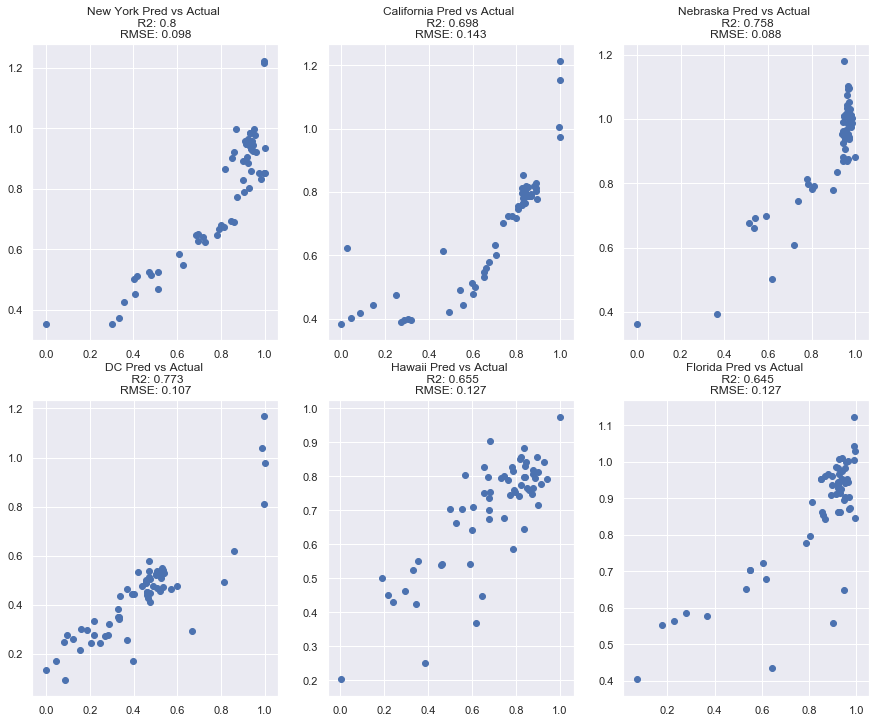

In [727]:
# print the intercept
fig, axes = plt.subplots(2, 3, figsize=(15,11))
axes[0][0].scatter(NYy_test,NYypred);axes[0][0].set_title('New York Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(NYy_test, NYypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(NYy_test, NYypred)).round(3)}')
axes[0][1].scatter(CAy_test,CAypred);axes[0][1].set_title('California Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(CAy_test, CAypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(CAy_test, CAypred)).round(3)}')
axes[0][2].scatter(NEy_test,NEypred);axes[0][2].set_title('Nebraska Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(NEy_test, NEypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(NEy_test, NEypred)).round(3)}')
axes[1][0].scatter(DCy_test,DCypred);axes[1][0].set_title('DC Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(DCy_test, DCypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(DCy_test, DCypred)).round(3)}')
axes[1][1].scatter(HIy_test,HIypred);axes[1][1].set_title('Hawaii Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(HIy_test, HIypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(HIy_test, HIypred)).round(3)}')
axes[1][2].scatter(FLy_test,FLypred);axes[1][2].set_title('Florida Pred vs Actual \n ' + 
                                                          f'R2: {str(metrics.r2_score(FLy_test, FLypred).round(3))}\n' +
                                                         f'RMSE: {np.sqrt(metrics.mean_squared_error(FLy_test, FLypred)).round(3)}')

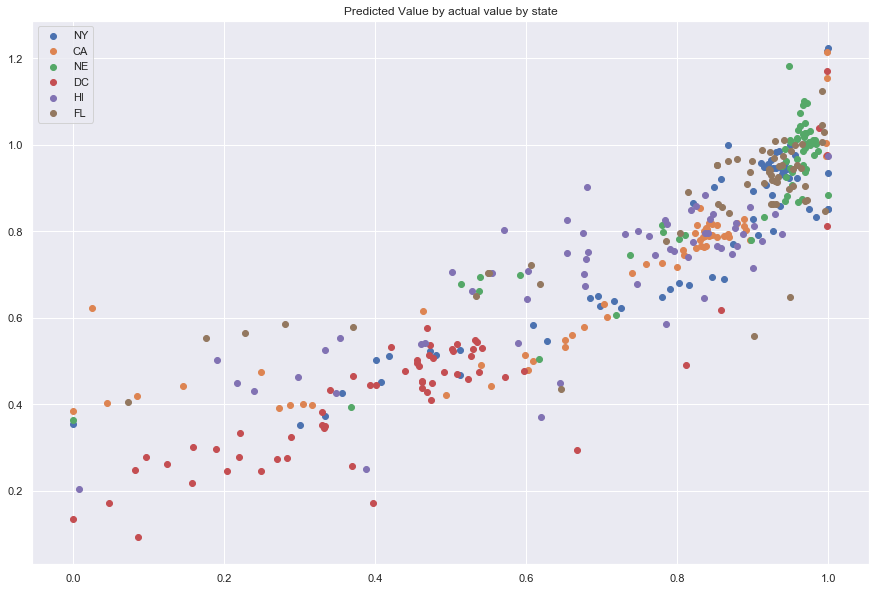

In [739]:
fig, axes = plt.subplots(figsize=(15,10))
plt.scatter(NYy_test,NYypred)
plt.scatter(CAy_test,CAypred)
plt.scatter(NEy_test,NEypred)
plt.scatter(DCy_test,DCypred)
plt.scatter(HIy_test,HIypred)
plt.scatter(FLy_test,FLypred)
plt.legend(['NY','CA','NE','DC','HI','FL'])
plt.title('Predicted Value by actual value by state')
plt.show()

This is just the mean of each state's stringency index. I put this here for informational purposes only. Its interesting that states like New York could be impacted by the index, yet others were not. 

In [475]:
print('New York had a mean Stringency Index of ' + str(df_NY['StringencyIndexForDisplay'].mean()))
print('California had a mean Stringency Index of ' + str(df_CA['StringencyIndexForDisplay'].mean()))
print('Nebraska had a mean Stringency Index of ' + str(df_NE['StringencyIndexForDisplay'].mean()))
print('Washinton DC had a mean Stringency Index of ' + str(df_DC['StringencyIndexForDisplay'].mean()))
print('Hawaii had a mean Stringency Index of ' + str(df_HI['StringencyIndexForDisplay'].mean()))
print('Florida had a mean Stringency Index of ' + str(df_FL['StringencyIndexForDisplay'].mean()))

New York had a mean Stringency Index of 0.8307954594842337
California had a mean Stringency Index of 0.7573386641409106
Nebraska had a mean Stringency Index of 0.752920502568336
Washinton DC had a mean Stringency Index of 0.7966021460130445
Hawaii had a mean Stringency Index of 0.7860679022832958
Florida had a mean Stringency Index of 0.7624841069762158


#### Linear Regression Summary
The variables used include google movement and stringency index to predict the economic metric. The six states show similar linear patterns with relatively strong prediction metrics. They all seem to indicate that the government response to the pandemic in conjunction with Google movement negatively influences the economic performance. There was some collinearity with the Google movement, but overall, the stringency metric appeared to effect each state's outcome. 


### Autoregression Models
This autoregression model forecasts using a linear combination of past values of the variable. In other words, this method of regression runs against itself with a set of lagged values.

### the first model is an autoregression forecast that will help predict the outcome of certain states

In [631]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


df_time = df_clustered[['Date','stateabbrev','econ_derived']]
# this will forse strings to a date timestamp format
df_time['Date'] = pd.to_datetime(df_time['Date'], errors='coerce')
# set the date as the index for the df
df_time = df_time.set_index('Date')
# resort the dataframe
df_time = df_time.sort_index()

Text(0.5, 1.0, 'All states and terretories economic performance over the review period')

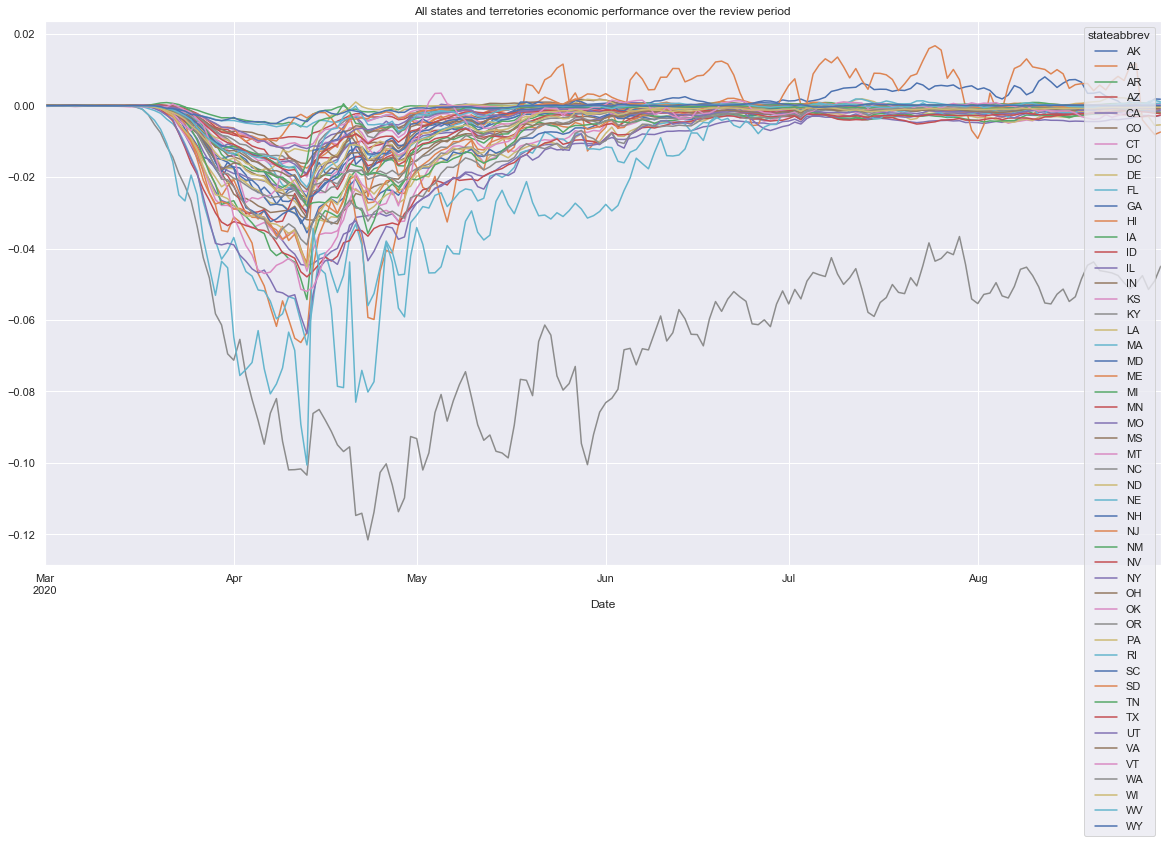

In [632]:
# this is just a plot of each state over the sample length
# the timeline is per week
df_time=df_time.groupby('stateabbrev').resample('D')['econ_derived'].mean()
df_new = df_time.unstack().T
df_new.plot().set_title('All states and terretories economic performance over the review period')

The graph above is supplied to show the disparity in how wome states performed over others. 

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

This will ensure the most impactful records are those towards the end of the timeline. Meaning, July will have more influence than April.

In [541]:
f'{len(df_new)} Days'

'184 Days'

In [617]:
184-60

124

In [618]:
# Set 5 weeks for testing
train = df_new.iloc[:124]
test = df_new.iloc[124:]


In [619]:
# shows the last records are in the test set
train.tail()

stateabbrev,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-28,0.001286,-0.000812,0.000032,-0.000781,-0.005184,-0.002178,-0.004122,-0.061865,-0.003230,-0.001182,...,-0.000452,-0.000576,-0.003160,-0.002476,-0.002464,-0.002107,-0.003468,-0.001264,-0.000461,0.000743
2020-06-29,0.000910,-0.000810,0.000075,-0.000842,-0.005142,-0.002024,-0.003634,-0.055555,-0.002962,-0.001091,...,-0.000424,-0.000564,-0.003096,-0.002563,-0.002061,-0.002572,-0.003393,-0.001162,-0.000266,0.000703
2020-06-30,0.001601,-0.000738,0.000132,-0.000766,-0.004450,-0.001751,-0.003168,-0.051856,-0.003041,-0.000911,...,-0.000297,-0.000417,-0.002837,-0.002043,-0.001693,-0.002501,-0.002941,-0.000962,-0.000194,0.000457
2020-07-01,0.001311,-0.000685,0.000107,-0.000840,-0.004301,-0.001473,-0.003074,-0.055494,-0.002465,-0.000772,...,-0.000298,-0.000446,-0.002819,-0.002092,-0.001823,-0.002255,-0.002527,-0.000967,-0.000122,0.000314
2020-07-02,0.001391,-0.000326,0.000175,-0.000689,-0.003787,-0.001271,-0.002931,-0.051432,-0.002617,-0.000595,...,-0.000177,-0.000350,-0.002695,-0.002298,-0.001389,-0.001838,-0.002436,-0.000841,0.000146,0.000091


In [620]:
test.head()

stateabbrev,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-03,0.001843,-0.000809,0.000011,-0.001102,-0.004560,-0.001401,-0.003995,-0.054087,-0.003903,-0.000811,...,-0.000764,-0.000520,-0.003210,-0.003175,-0.002069,-0.003137,-0.003042,-0.001533,-0.000087,0.000281
2020-07-04,0.001142,-0.000123,0.000074,-0.000660,-0.002947,-0.000864,-0.002145,-0.049095,-0.002201,-0.000296,...,0.000015,-0.000158,-0.002334,-0.001525,-0.000864,-0.001981,-0.001647,-0.000684,0.000012,0.000063
2020-07-05,0.001402,-0.000146,0.000178,-0.000528,-0.002941,-0.000763,-0.002357,-0.046690,-0.002145,-0.000311,...,-0.000042,-0.000174,-0.002451,-0.001587,-0.000736,-0.001466,-0.001178,-0.000600,0.000361,-0.000381
2020-07-06,0.001755,-0.000233,0.000323,-0.000459,-0.002953,-0.000934,-0.002261,-0.047330,-0.002183,-0.000373,...,-0.000092,-0.000236,-0.002455,-0.001724,-0.000942,-0.000334,-0.000333,-0.000720,0.000272,-0.000422
2020-07-07,0.002366,-0.000223,0.000307,-0.000446,-0.003222,-0.001019,-0.001967,-0.047821,-0.002023,-0.000442,...,-0.000063,-0.000280,-0.002432,-0.001871,-0.000958,0.000432,0.000095,-0.000551,0.000315,-0.000388


In [480]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

In [740]:
def runAutoRegression(state,b_lag=60):
    model = AR(train[state])
    # order 15 days lag coeff behind
    #CMLE Conditional max liklihood OLS
    AR1fit = model.fit(maxlag=14,method='cmle')
    # this just hsows where the data starts and ends training
    start=len(train)
    end=len(train)+len(test)-1
    # predicting start index point to end index point
    predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR 14 Day Lag Predictions')   
    # Recall that our model was already created above based on the training set
    AR2fit = model.fit(maxlag=30,method='cmle')
    start=len(train)
    end=len(train)+len(test)-1
    predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR 30 Day Lag Predictions')    
    ARfit = model.fit(maxlag=60,method='cmle')
    start = len(train)
    end = len(train)+len(test)-1
    predictions3 = ARfit.predict(start=start,end=end,dynamic=False).rename('AR 60 Day Lag Predictions')  
    
    # plot each prediction
    test[state].plot(legend=True)
    predictions1.plot(legend=True)
    predictions2.plot(legend=True)
    predictions3.plot(legend=True,figsize=(12,6))
    plt.title(state + ' economic predictions');
    
    from sklearn.metrics import mean_squared_error

    labels = ['AR(1)','AR(2)','AR(3)']
    preds = [predictions1, predictions2, predictions3]  # these are variables, not strings!
    
    # calculate the root mean square error for each model
    for i in range(3):
        error = mean_squared_error(test[state], preds[i])
        print(f'{labels[i]} MSE Error: {error:11.10}')
        
    # First, retrain the model on the full dataset
    model = AR(df_new[state])

    # Next, fit the model
    ARfit = model.fit(maxlag=b_lag,method='cmle')

    # Make predictions
    fcast = ARfit.predict(start=len(df_new), end=len(df_new)+60, dynamic=False).rename(f'Forecast = {b_lag} Day Lag')

    # Plot the results
    df_new[state].plot(legend=True)
    fcast.plot(legend=True,figsize=(12,6));


AR(1) MSE Error: 0.0003957665119
AR(2) MSE Error: 2.417601292e-05
AR(3) MSE Error: 2.417601292e-05


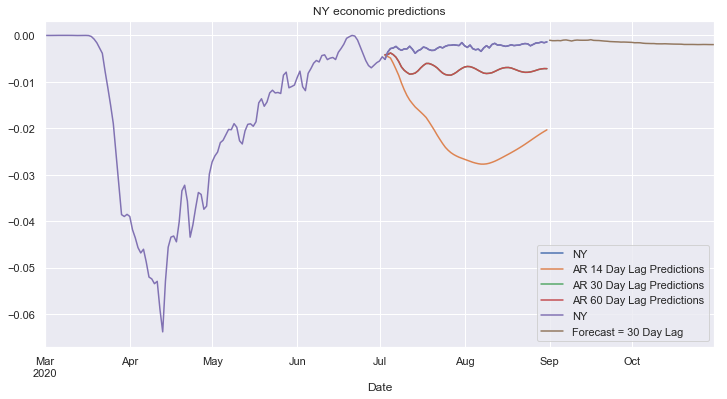

In [741]:
runAutoRegression('NY', b_lag=30)

AR(1) MSE Error: 2.808874092e-06
AR(2) MSE Error: 1.243433584e-07
AR(3) MSE Error: 1.108656401e-08


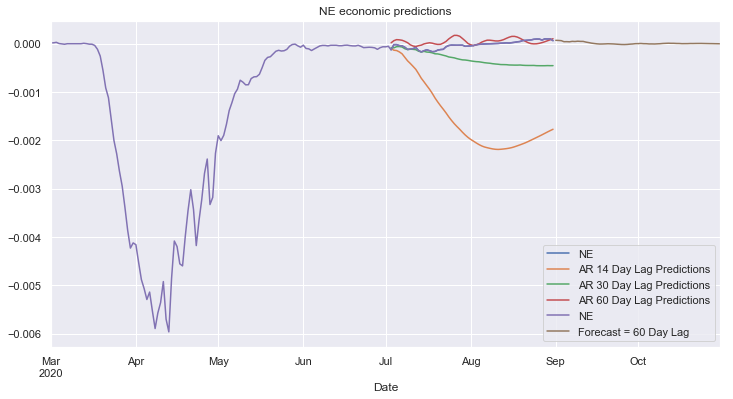

In [685]:
runAutoRegression('NE',b_lag=60)

AR(1) MSE Error: 0.0002587309565
AR(2) MSE Error: 1.330440755e-05
AR(3) MSE Error: 3.466729687e-05


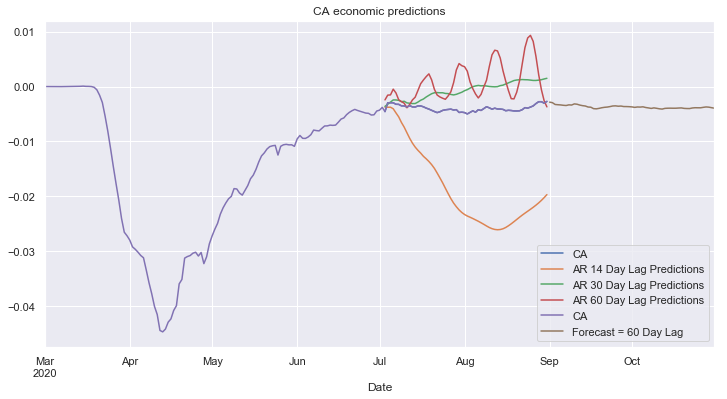

In [686]:
runAutoRegression('CA',b_lag=60)

AR(1) MSE Error: 0.0005782922921
AR(2) MSE Error: 0.000744398148
AR(3) MSE Error: 0.000744398148


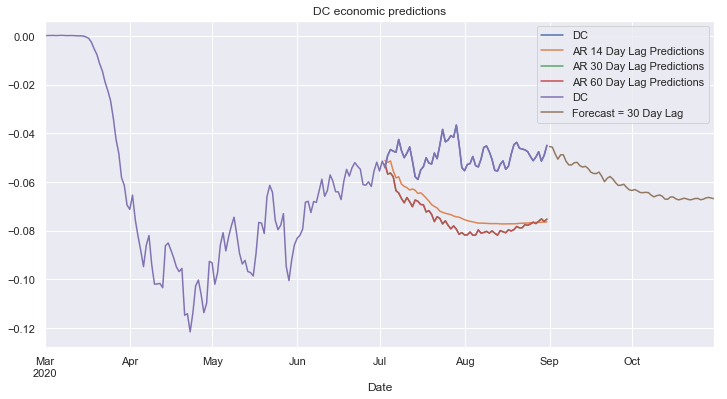

In [742]:
runAutoRegression('DC', b_lag=30)

AR(1) MSE Error: 0.0004348670567
AR(2) MSE Error: 0.0005395661074
AR(3) MSE Error: 0.0005395661074


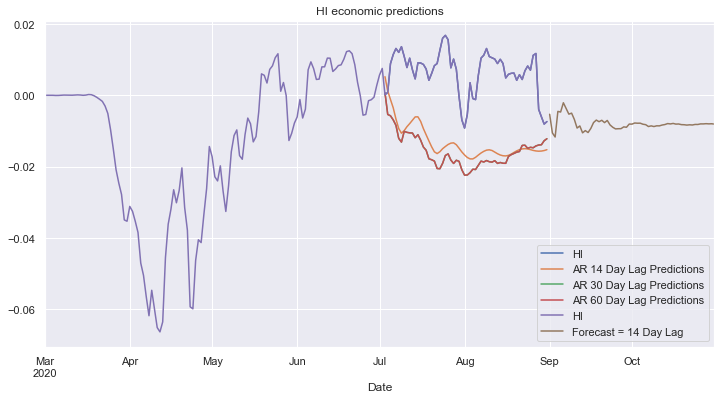

In [744]:
runAutoRegression('HI', b_lag = 14)

AR(1) MSE Error: 3.885225457e-05
AR(2) MSE Error: 2.421436644e-05
AR(3) MSE Error: 8.120442811e-06


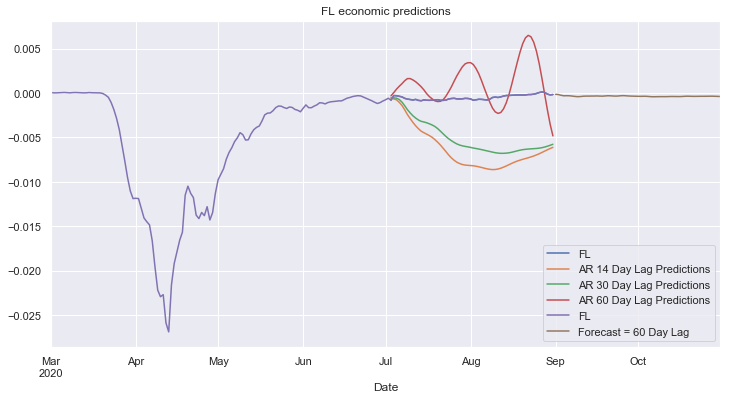

In [689]:
runAutoRegression('FL', b_lag=60)

### references

1 Portilla, J. (n.d.). Python for time series data Retireved form https://www.udemy.com/course/python-for-time-series-data-analysis/learn/lecture/14295610#overview